## K-Nearest Neighbors

K nearest neighbors or KNN Algorithm is a simple algorithm which uses the entire dataset in its training phase. Whenever a prediction is required for an unseen data instance, it searches through the entire training dataset for k-most similar instances and the data with the most similar instance is finally returned as the prediction. 

Most similar items is found by calculating the distance between 2 data points ia a space.

The similarity measure is dependent on the type of data. For real-valued data, the Euclidean distance can be used. Other other types of data such as categorical or binary data, Hamming distance can be used.

In the case of regression problems, the average of the predicted attribute may be returned. In the case of classification, the most prevalent class may be returned.

** k in kNN algorithm represents the number of nearest neighbor points which are voting for the new test data’s class.**
![](KNN-Algorithm.png)

### Steps:
1. Find distances between new item and all other items
2. Pick k shorter distances
3. Pick the most common class in these k distances
4. That class is where we will classify the new item

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from collections import Counter

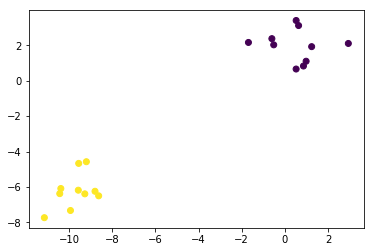

In [2]:
# input data
(X,y) =  make_blobs(n_samples=20,n_features=2,centers=2,random_state=101)

plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.show()

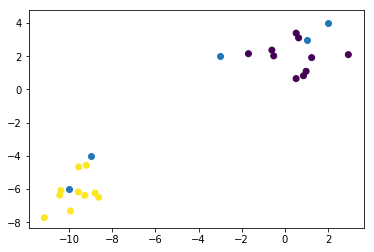

In [3]:
# points for testing (blue marked)
test_points=[[-10,-6],[-9,-4],[-3,2],[2,4],[1,3]]
test_points=np.array(test_points)
plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.scatter(test_points[:,0],test_points[:,1],marker='o')
plt.show()

In [4]:
#eculidean_distance between 2 data points
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]     # k - specifies the top k points that closer to the test point

In [5]:
def predict(test_points,k):
    points_labels=[]
    
    for point in test_points:
        distances=get_eculidean_distance(point,k)
        
        results=[]
        for index in distances:
            results.append(y[index]) # top k point's label
        
        label=Counter(results).most_common(1)  # returns highest occured label
        points_labels.append([point,label[0][0]])
        
    return points_labels

In [6]:
results=predict(test_points,10) # here k=10
for result in results:
    print("Point = ",result[0])
    print("Class = ",result[1])
    print('\n')

Point =  [-10  -6]
Class =  1


Point =  [-9 -4]
Class =  1


Point =  [-3  2]
Class =  0


Point =  [2 4]
Class =  0


Point =  [1 3]
Class =  0




In [7]:
results

[[array([-10,  -6]), 1],
 [array([-9, -4]), 1],
 [array([-3,  2]), 0],
 [array([2, 4]), 0],
 [array([1, 3]), 0]]

In [8]:
np.array(results)[:,1]

array([1, 1, 0, 0, 0], dtype=object)

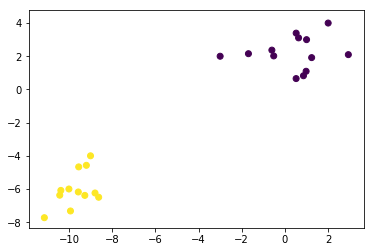

In [9]:
# plot both train and test data with label  
plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.scatter(test_points[:,0],test_points[:,1],marker='o',c=np.array(results)[:,1])
plt.show()

The kNN algorithm is belongs to the family of instance-based, competitive learning and lazy learning algorithms.

Instance-based algorithms are those algorithms that model the problem using data instances (or rows) in order to make predictive decisions. The kNN algorithm is an extreme form of instance-based methods because all training observations are retained as part of the model.

It is a competitive learning algorithm, because it internally uses competition between model elements (data instances) in order to make a predictive decision.

Lazy learning refers to the fact that the algorithm does not build a model until the time that a prediction is required.